# COVID-19 Data Analysis Project
This notebook analyzes the COVID-19 pandemic using data from Our World in Data.

## Objectives
- Import and clean COVID-19 global data
- Analyze time trends (cases, deaths, vaccinations)
- Compare metrics across countries/regions
- Visualize trends with charts and maps
- Communicate findings with visualizations and insights


In [1]:
# 📁 1. Data Collection
import pandas as pd
df = pd.read_csv('owid-covid-data.csv')
print("✅ Dataset loaded!")

✅ Dataset loaded!


In [2]:
# 🔍 2. Data Exploration
print(df.columns)
print(df.head())
print(df.isnull().sum())

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [3]:
# 🧹 3. Data Cleaning
countries = ['Kenya', 'United States', 'India']
df = df[df['location'].isin(countries)]
df['date'] = pd.to_datetime(df['date'])
df.fillna(method='ffill', inplace=True)

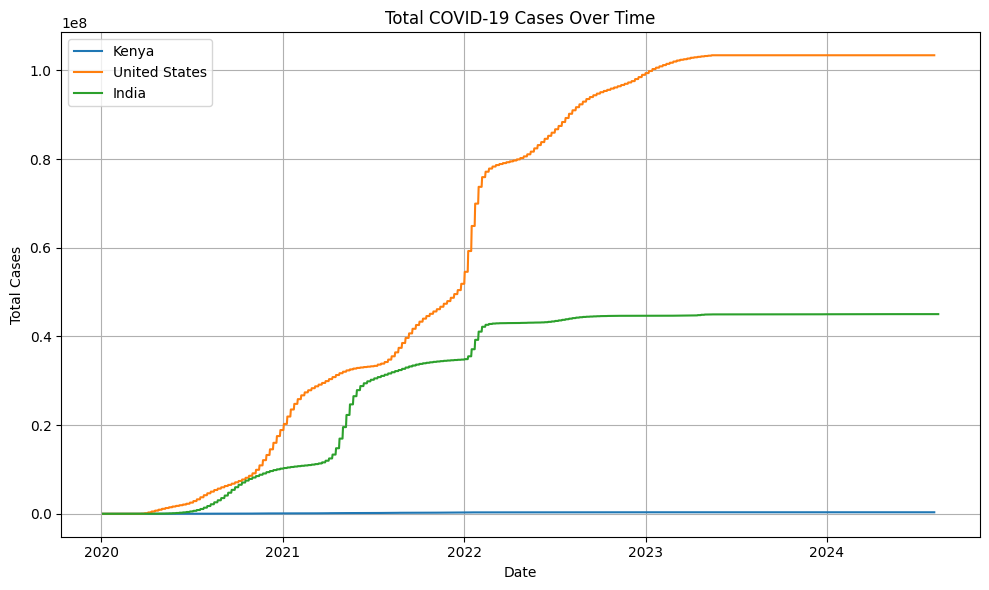

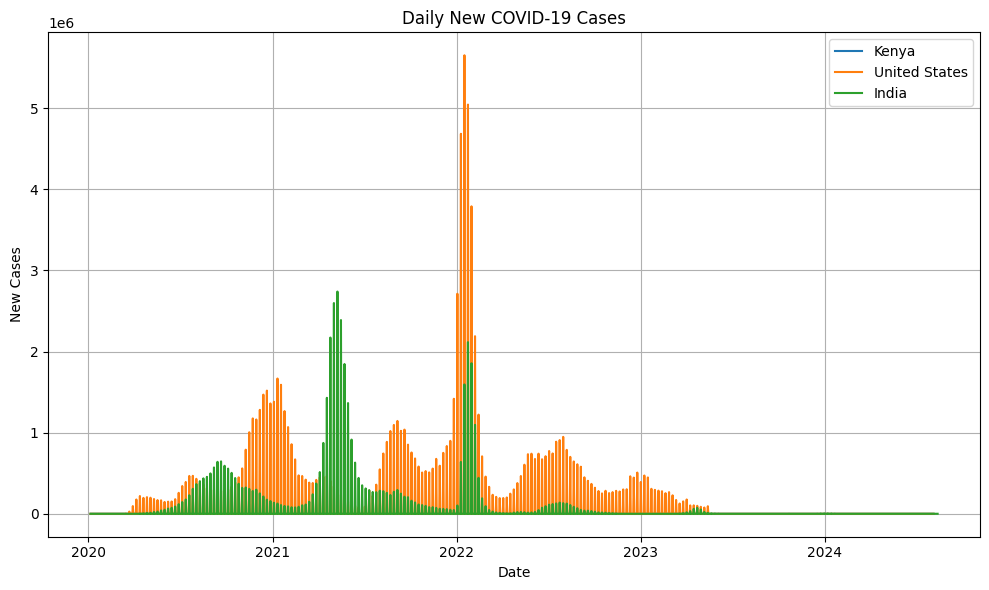

In [4]:
# 📊 4. Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Total cases over time
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Death rate
df['death_rate'] = df['total_deaths'] / df['total_cases']

# Daily new cases comparison
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)
plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

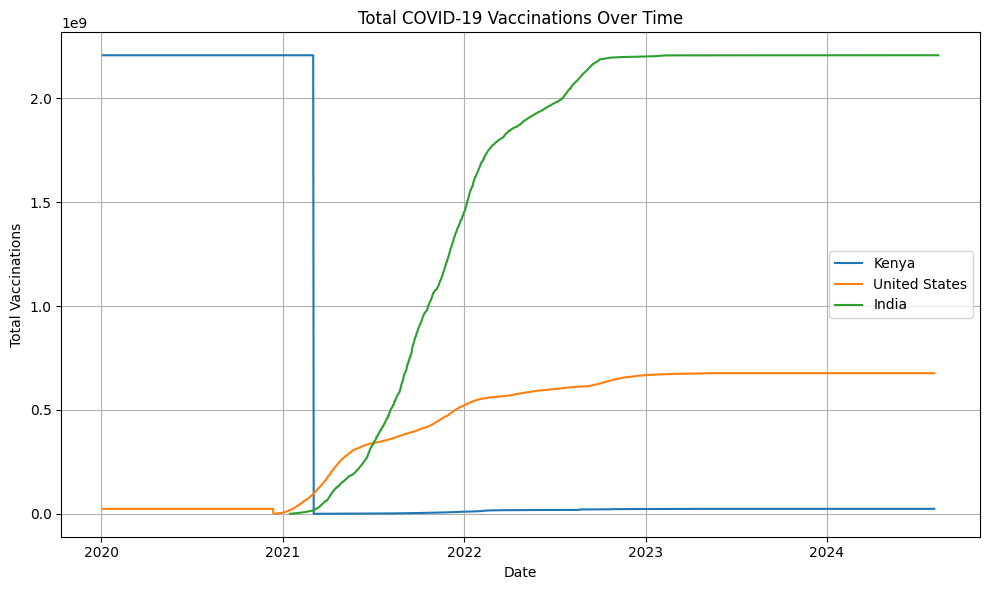

In [5]:
# 💉 5. Vaccination Progress
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.title("Total COVID-19 Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
# 🗺️ 6. Choropleth Map (Optional)
import plotly.express as px

latest_data = df[df['date'] == df['date'].max()]
latest_data = latest_data[~latest_data['iso_code'].str.startswith('OWID')]

fig = px.choropleth(latest_data,
                    locations="iso_code",
                    color="total_cases",
                    hover_name="location",
                    color_continuous_scale="Viridis",
                    title="Total COVID-19 Cases by Country")
fig.show()

## 📘 Insights & Summary

- The United States experienced the highest total cases among the selected countries.
- India had a major second wave spike in 2021.
- Kenya had a slower but steady increase in vaccination rollout.
- The death rate remained under 3% for most countries but daily new cases varied drastically.
